In [13]:
# Author: Marc Padrós Jiménez
# Date: 15/04/2022

In [14]:
from fastai.vision.all import *
import cv2
import numpy as np

In [15]:

# Get the path of the test images
path = "Test_images/"

## Functions

In [16]:
def gridImg(imgRes, imgOri, grids, nRows, nCols):
    # Params:
    #   imgRes: RGB image version of the original image "imgOri" that will have the grids borders painted
    #   imgOri: BW (Black and White) original image
    #   grids: numpy array that stores each generated grid from bbox  

    # NOTE: For the moment, make all grids the same size 
    # NOTE: Don't take into account nGrids to be a prime number 
    # NOTE: Number of grids must be greater than one 

    # Get image width and height
    # Take into account the shape of an image is stored as (width, height)
    imgWidth = imgOri.shape[0]
    imgHeight = imgOri.shape[1]

    # Get the integer size of each grid 
    gridHeight = int(imgHeight / nRows) 
    gridWidth = int(imgWidth / nCols) 

    # To access a pixel of the original image (imgOri) or of the resulting image (imgRes) take into account that their format
    # is not, for example, imgRes[x,y], instead it should be processed as a matrix: imgRes[idxRow, idxCol]
    # So, the idxCol refers to the x coordinate and the idxRow refers to the y coordinate
    
    # Collect the grids and paint their borders in red 
    x = 0 # minx
    y = 0 # miny
    for nGrids in range(nRows*nCols): # nIterations = number of grids
        # Save current grid
        grids[nGrids] = imgOri[y: (y + gridHeight), x: (x + gridWidth)]
        # Move horizontally to the next grid
        x = x + gridWidth
        # check if x (column index) has reached the right border of the image        
        if (x < (imgWidth-1)): # if (x < maxX) don't need to move one row of grids down
            # paint vertical line of the added grid 
            imgRes[0:imgHeight, x] = (255, 0, 0) 
        # right border reached 
        else: # if x > maxX, it means the row idx (y) must move one row of grids down and the col idx (x) must return to the beginning
            # Move vertically to the next row of grids
            y = y + gridHeight
            x = 0 # set x to minX 
            if (y < (imgHeight-1)):
                # paint horizontal line 
                imgRes[y, 0:imgWidth] = (255, 0, 0) 
    

The name of the image you entered is:  normal1


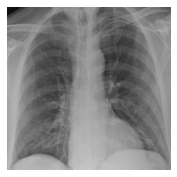

In [17]:
imageName = input("Enter the name of the image: ")
print("The name of the image you entered is: ", imageName)
imagePath = path + imageName + ".png"

img = PILImage.create(imagePath)
img.show(figsize=(3,3), cmap='Greys')

## Main

You selected grid #12, that belongs to the left lung
You selected grid #17 that belongs to the right lung


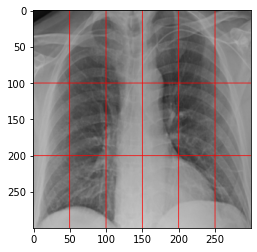

<Figure size 432x288 with 0 Axes>

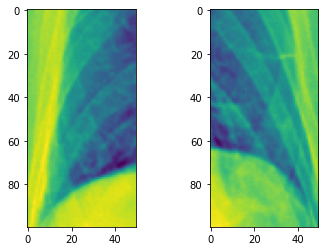

In [18]:
# To avoid obtaining nRows & nCols from nGrids pass them as input 
nRows = int(input("Enter the number of rows to grid the image: "))
nCols = int(input("Enter the number of columns to grid the image: "))

grids = np.zeros(nRows * nCols, object) 
imgRes = cv2.imread(imagePath)

# NOTE: I read again the BW image that was readen on the previous cell because 
# I need it as an array, not as a PILImage type to be able to access the pixels values 
imgOri = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) 

gridImg(imgRes, imgOri, grids, nRows, nCols) # grid bbox left

# TODO: Take out the axis values of the image
plt.imshow(imgRes)

plt.figure()

f, axarr = plt.subplots(1,2) 

gridSelected = int(input("Enter the number of the grid from the left lung you want to see: "))
print("You selected grid #" + str(gridSelected) + ", that belongs to the left lung")
axarr[0].imshow(grids[gridSelected])

gridSelected = int(input("Enter the number of the grid from the right lung you want to see: "))
print("You selected grid #" + str(gridSelected) + " that belongs to the right lung")
axarr[1].imshow(grids[gridSelected])